# Exercise 3
---

<img src="resources/gradient_descent.gif"  />

# Topic 1: Implementing Gradient descent and plotting resulting regression line and data points
Use the data from below for the following assignments:
- $X$: feature vector of data points
- $Y$:=label vector 

#### 1. Implement `MSE` loss function, compare your results with sklearns mse function
documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

$MSE_{matrix} = \frac{1}{N} \lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2} $


#### HINT: 
---
$\lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2} = (\mathbf{X}w - \mathbf{y})^{T}(\mathbf{X}w - \mathbf{y})$ 
#### 2. Implement gradient descent algorithm
#### Algorithm pseudo-code
---
```python
Initialize w(0)=100
for step in range(training steps):
    w(t+1) = w(t) - alpha * grad( J( w(t) ) ) 
    mse = mse(w(t+1))
    print(mse)
```
#### Hints: 
---
- Start with a w value of 100
- grad( J( w(t) ) ) = ($\nabla_{w_{1}} MSE$)

$\nabla_{w_{1}} MSE = \frac{w_{1}\mathbf{X^{T}X} - \mathbf{X^{T}y}}{N}$
##### 3. Run gradient descent for 100 training iterations with a learning rate alpha = [1, 0.01, 0.005] and plot the mse-error(y-axis) over the number of training iterations(x-axis) for each alpha

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Given data
# The X matrix includes 100 datapoints, and 1 feature only. 
X = 2.5 * np.random.rand(100) + 1.5   
res = 0.2 * np.random.randn(100)
Y = 0.3 * X + res

In [3]:
X.shape

(100,)

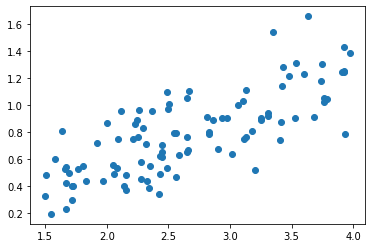

In [4]:
plt.scatter(X,Y)

In [5]:
def mse(X, w1, Y_true):
    # w가 어떤 상수 일때
    return np.dot((X*w1-Y_true).T, (X*w1-Y_true)) / len(X)

In [11]:
print(mse(X, 0.5, Y), mse(X, 0.2, Y))

0.34857820292625796 0.11218879006148788


In [12]:
# sklearn에 있는 내장함수 사용
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y, X*0.5))
print(mean_squared_error(Y, X*0.2))

0.3485782029262579
0.1121887900614879


In [13]:
def gradient_descent(X, Y, training_itrs, alpha):
    
    w = 100
    mse_errors = []
    
    for i in range(training_itrs):
        # gradient
        delta_J = (1/len(X)) *(w*np.dot(X.T, X)-np.dot(X.T, Y))
        # w의 업데이트
        w = w-alpha*delta_J
        # mse 오차 계산
        mse_errors.append(mse(X, w, Y))
    
    plt.plot(mse_errors)
    
    return w

0.3352338227611109

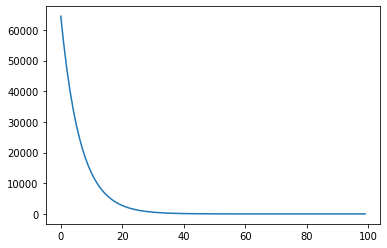

In [14]:
# Your code should work when calling the following function
alpha=0.01 # learning rate
gradient_descent(X, Y, 100, alpha)

# Topic 2: Multiple Linear Regression on Real estate data

### Please work on the following assignments:
---
##### 1. Split data into training and test set
- shuffle the data
- 80 % training set, 20 % test set
- use numpy
- at the end you should have: x_train, y_train, x_test, y_test

##### 2. Separate labels(house price) from rest of the data
##### 3. Fill in missing values and drop categorical ones
##### 4. Train model using the following regression method from sklearn:

- Linear Regression

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

##### 5. Compute MSE and residual error on test set
### ***Optional*** Assignment: 
##### 6. Compute the average house price
##### 7. Compute the max. house prize
##### 8. Compute the min. house prize
##### 9. Compute histogram of house prices
##### 10. Compute percentage of house prices higher than 1 mio. and plot histogram of those above 1 mio.
##### 11. Which object offers the most rooms ? Whats the prize ?
##### 12. How much do you, on average, pay for a room ? 

### Just FYI:
---
MSE formula for multidimensional linear regression:


Loss = $\frac{1}{2N} \lvert\lvert \mathbf{X}\mathbf{w}-\mathbf{y} \lvert\lvert^{2}$

$\mathbf{X}\epsilon\mathbb{R^{Nxd}}$,
$\mathbf{w}\epsilon\mathbb{R^{dx1}}$,
$\mathbf{y}\epsilon\mathbb{R^{Nx1}}$

In [16]:
data = pd.read_csv('data/USA_Housing.csv')
data.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

- solution 1~3 : 데이터 준비하기

In [19]:
# pandas를 이용해서 데이터 나누기
x_train, y_train, x_test, y_test = train_test_split(data.iloc[:, :5],
                                                   data.iloc[:, 5],
                                                   test_size=0.2,
                                                   shuffle=True)

In [22]:
# numpy를 이용해서 데이터 나누기
indices = np.random.permutation(data.shape[0])
train_indices = indices[:int(len(data)*0.8)]
test_indices = indices[int(len(data)*0.8):]

x_train, y_train, x_test, y_test = data.iloc[train_indices, :5],\
                                    data.iloc[train_indices,5],\
                                    data.iloc[test_indices, :5],\
                                    data.iloc[test_indices, 5]

[np.random.permutation이 뭘까?](https://medium.com/@shistory02/numpy-permutation-vs-shuffle-34fe56f0c246)

In [23]:
np.random.permutation(100)[:10]

array([27, 17, 50, 11, 21, 79,  7, 67, 91, 18])

In [28]:
x_train.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
711,71093.691960,5.874953,5.871746,3.26,37143.398730
2633,71105.291559,5.959945,7.778721,4.49,48457.021357
3227,77742.189153,5.076625,7.377512,4.41,22231.830323


In [29]:
y_train.head(3)

711     1.096846e+06
2633    1.640186e+06
3227    1.105024e+06
Name: Price, dtype: float64

- solution 4~5 : 선형 회귀 모델 불러와서 학습시키고 오차 구하기

In [26]:
model = LinearRegression()
model = model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

print(f"Train residuals : {np.sum(y_train-train_predictions)}")
print(f"Test residuals : {np.sum(y_test-test_predictions)}")
print("-"*40)
print(f"Train MSE : {mean_squared_error(y_train, train_predictions)}")
print(f"Test MSE : {mean_squared_error(y_test, test_predictions)}")

Train residuals : -7.591443136334419e-07
Test residuals : -2078620.6949957195
----------------------------------------
Train MSE : 10136304326.380114
Test MSE : 10567441820.804823


피쳐 중에 하나인 `Avg. Area Income`와 `price(prediction)`간의 관계 살펴보기

Avg. Area Income


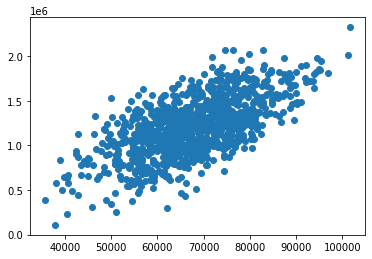

In [31]:
print(x_test.columns[0])
plt.scatter(x_test.iloc[:,0], test_predictions)

- solution 6~8 : 라벨인 price의 최대/최소/평균 알아보기

In [33]:
max_prize = data['Price'].max()
min_prize = data['Price'].min()
avg_prize = data['Price'].mean()

print(max_prize)
print(min_prize)
print(avg_prize)

2469065.5941747027
15938.657923287848
1232072.654142357


- solution 9 : 라벨인 price에 따른 집 갯수 알아보기(히스토그램)

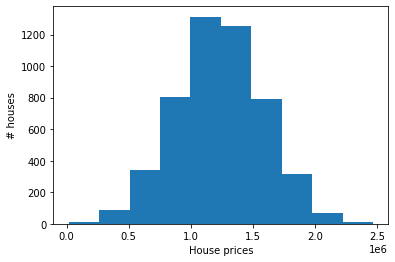

In [34]:
plt.hist(data['Price'])
plt.xlabel('House prices')
plt.ylabel('# houses')
plt.show()

- solution 10 : 집값이 1million 보다 큰 특징 집들 조사하기

Percentage of houses that cost more than 1mio.: 74.74%


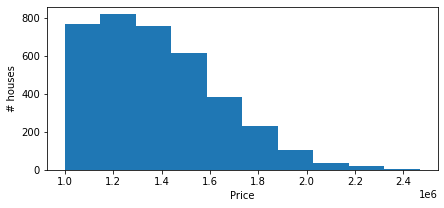

In [36]:
above_1mio = data[data['Price'] > 1000000]['Price']

per_above_1mio = len(above_1mio) / data.shape[0]

print(f'Percentage of houses that cost more than 1mio.: {100*per_above_1mio}%')

plt.figure(figsize=(7,3))
plt.hist(above_1mio)
plt.xlabel('Price')
plt.ylabel('# houses')
plt.show()

- solution 11 : Which object offers the most rooms ? Whats the prize ? 방 갯수의 평균이 가장 많은 데이터를 iloc으로 불러서 다른 피쳐들 살펴보기
    - np.argmax() 이용

In [39]:
data.iloc[np.argmax(data['Avg. Area Number of Rooms'])]

Avg. Area Income                                                    69505.1
Avg. Area House Age                                                 7.35235
Avg. Area Number of Rooms                                           10.7596
Avg. Area Number of Bedrooms                                           5.14
Area Population                                                     48112.2
Price                                                           2.23529e+06
Address                         0665 Dawn Overpass\nEast Sarabury, CA 82390
Name: 1536, dtype: object

- solution 12 : "평균방의 수당 집값" 평균 구하기

In [40]:
np.sum(data['Price'] / data['Avg. Area Number of Rooms']) / data.shape[0]

177646.06835283132

### (Optional) Topic 3: Implement a Multiple Linear Regression by hand:

Write a class that has the following methods:

- `fit(X,Y)`: Should fit the model weights using feature matrix X and label vector y. Use closed form solution to find perfect w-vector.
    - [np.linalg.inv : 역행렬 구하기](https://rfriend.tistory.com/380)
- `predict(X)`: Should make predictions label predictions for X.
- `score(X,Y)`: Should make label predictions on X, and compute mse using the label information Y and the predictions.
- train and evaluate your model on the "USA_housing.csv" dataset

In [46]:
class LinearRegression():
    
    def __init__(self):
        self.w = None
        
    def fit(self,X,y):
        # Compute closed form solution
        # lecture노트의 "Mathematical optimization problem formulation" 파트 참고
        w_opt = np.dot( np.linalg.inv(np.dot(X.T,X)) , np.dot(X.T,y) )
        self.w = w_opt
    
    def predict(self,X):
        predictions = np.dot(X,self.w)
        return predictions
    
    def mse_score(self,X,y):
        predictions = self.predict(X)
        # mse 오차 구하기(sklearn 내장 모듈 이용)
        return mean_squared_error(y, predictions)

In [47]:
# bias term인 b는 그냥 상수로 하나 컬럼 추가하면 됨
x_train_with_bias = np.hstack([np.ones((x_train.shape[0], 1)), x_train])

In [48]:
test_model = LinearRegression() # 직접 만든 LR

In [49]:
test_model.fit(x_train_with_bias, y_train)

In [50]:
test_model.mse_score(x_train_with_bias, y_train)

10136304326.380114

In [51]:
# Train MSE : 10136304326.380114
# Test MSE : 10567441820.804823
# 위에서 sklearn에서 LR 불러와서 구했던 MSE

In [52]:
x_test_with_bias = np.hstack([np.ones((x_test.shape[0], 1)), x_test])
test_model.mse_score(x_test_with_bias, y_test)

10567441820.804996